In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
from scipy import stats

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

(0.0, 1.0)

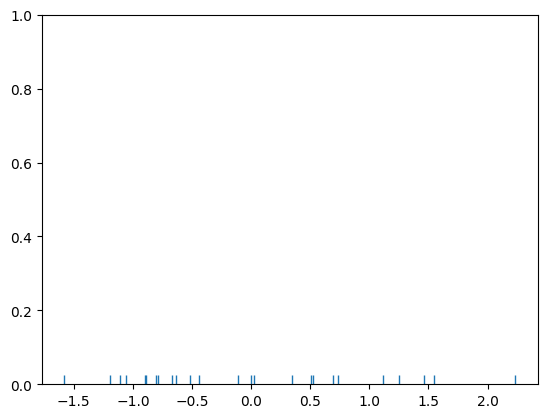

In [4]:
dataset = randn(25)
sns.rugplot(dataset)
plt.ylim(0,1)

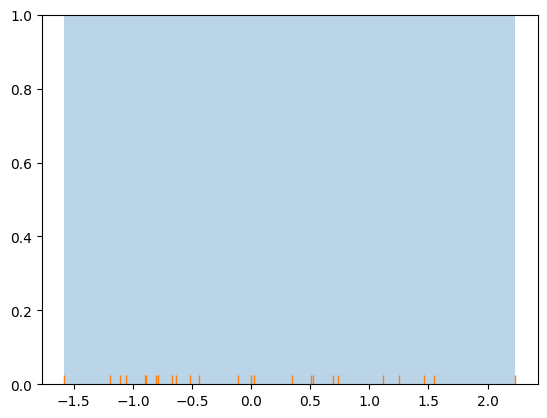

In [5]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)
plt.ylim(0,1)
plt.show()

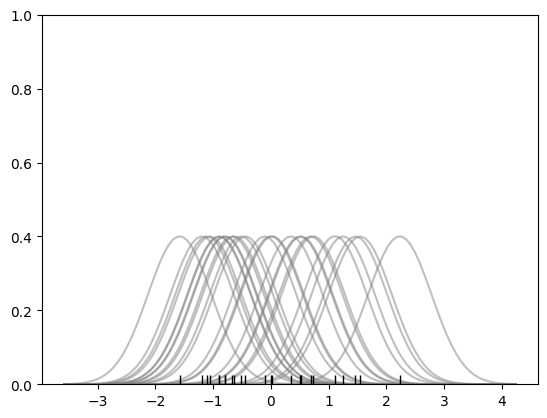

In [7]:
# Silverman’s Rule of Thumb
std = dataset.std()
n = len(dataset)
bandwidth = (4 * std**5 / (3 * n))**0.2

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

kernel_list = []

for point in dataset:
    kernel = stats.norm(point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    plt.plot(x_axis, kernel / kernel.max() * 0.4, color="grey", alpha=0.5)

sns.rugplot(dataset, color='black')
plt.ylim(0, 1)
plt.show()

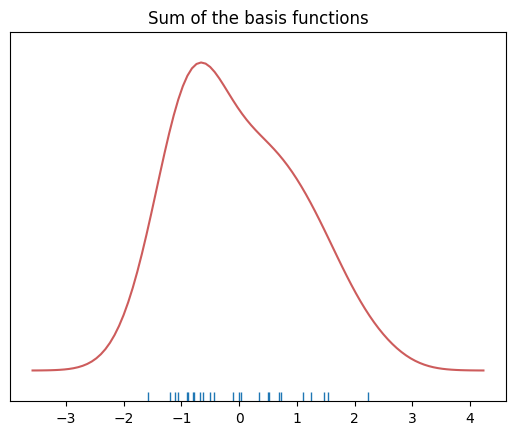

In [8]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.title("Sum of the basis functions")
plt.show()

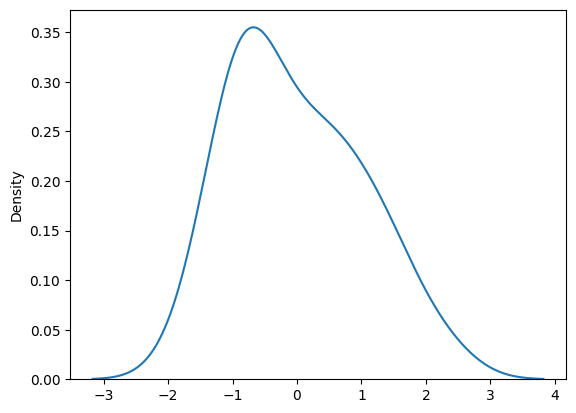

In [9]:
sns.kdeplot(dataset)
plt.show()

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/4223917359.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/4223917359.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/4223917359.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an err

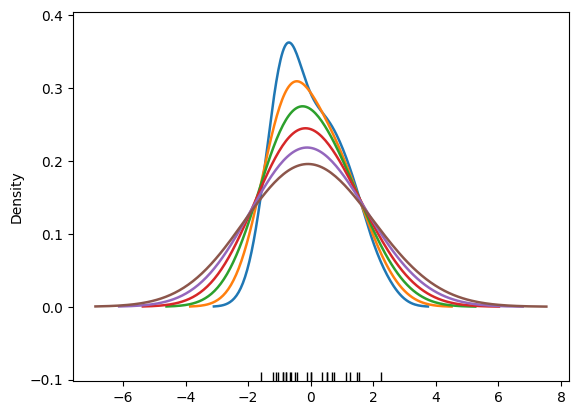

In [10]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
  sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/1519953957.py:4: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset,kernel=kern,label=kern)
/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/1519953957.py:4: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset,kernel=kern,label=kern)
/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/1519953957.py:4: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset,kernel=kern,label=kern)
/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/1519953957.py:4: UserWarning: 

Support for alternate kernels has been removed; u

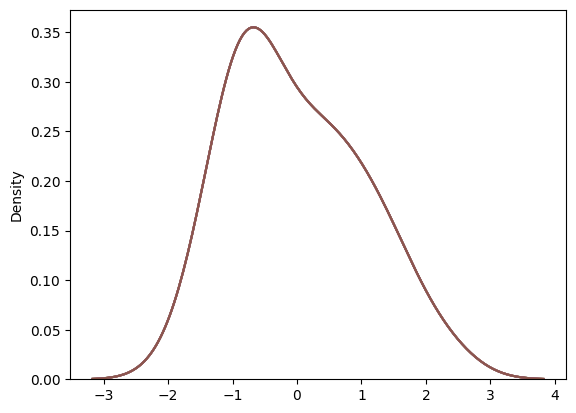

In [11]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
  sns.kdeplot(dataset,kernel=kern,label=kern)

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2124/1674317051.py:1: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset,vertical=True)


<Axes: xlabel='Density'>

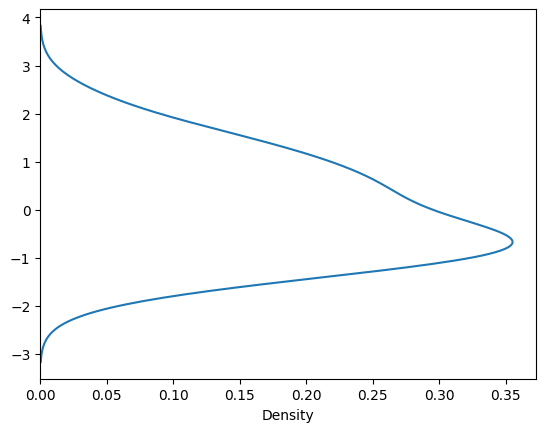

In [12]:
sns.kdeplot(dataset,vertical=True)

<Axes: ylabel='Density'>

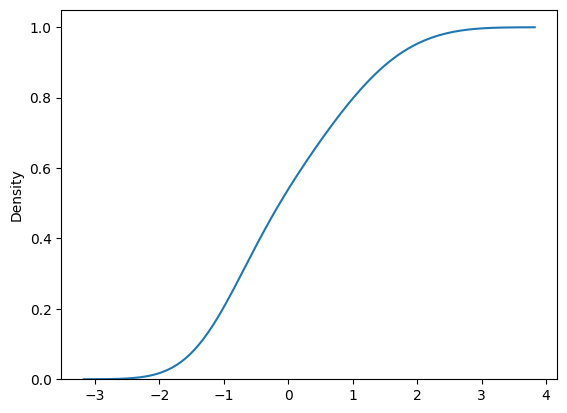

In [13]:
sns.kdeplot(dataset,cumulative=True)

<Axes: xlabel='X', ylabel='Y'>

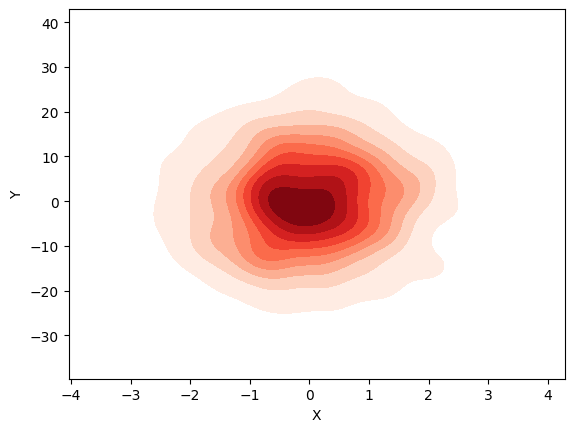

In [16]:
mean = [0,0]
cov= [[1,0],[0,100]]
dataset2 =np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(data=dframe, x='X', y='Y', fill=True, cmap='Reds')

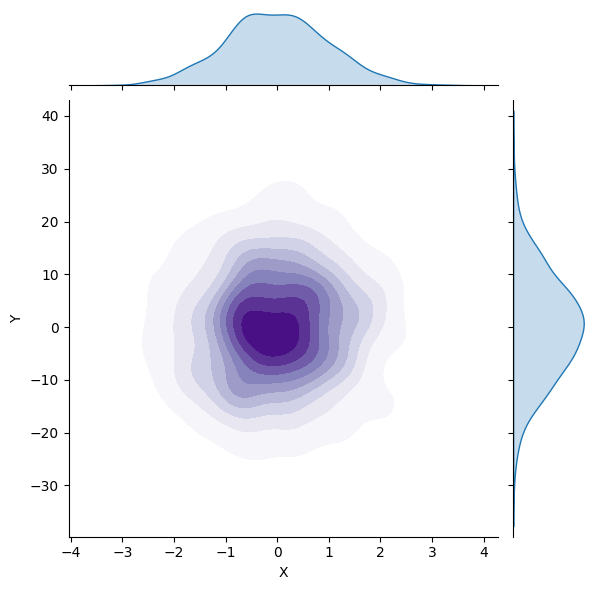

In [18]:
sns.jointplot(data=dframe, x='X', y='Y', kind='kde', fill=True, cmap='Purples')
plt.show()